In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('"{name}" carregado com sucesso.'.format(name=fn))

csv_filename = list(uploaded.keys())[0]
print(f"Arquivo '{csv_filename}' carregado.")

Saving minkowski_results.csv to minkowski_results (1).csv
"minkowski_results (1).csv" carregado com sucesso.
Arquivo 'minkowski_results (1).csv' carregado.


In [6]:
df = pd.read_csv(csv_filename)

print("--- Tabela de Aalise e Distancia Minima ---")
display(df)

--- Tabela de Aalise e Distancia Minima ---


,target_vertices,m_real,n_real,mn_points_generated,mean_time_s,std_time_s,min_distance
0,10,13,14,182,0.001666,0.000553,435.888274
1,20,18,19,342,0.002899,0.000802,422.080296
2,30,19,19,361,0.002807,0.000558,413.632509
3,40,23,22,506,0.006167,0.002647,412.651967
4,50,23,25,575,0.006962,0.002424,407.068475
5,70,27,25,675,0.009843,0.002794,411.007756
6,90,29,31,899,0.010676,0.001513,406.694841
7,110,31,34,1054,0.015711,0.004078,405.970893


Gráfico 'minkowski_performance_graph_N.png' salvo.


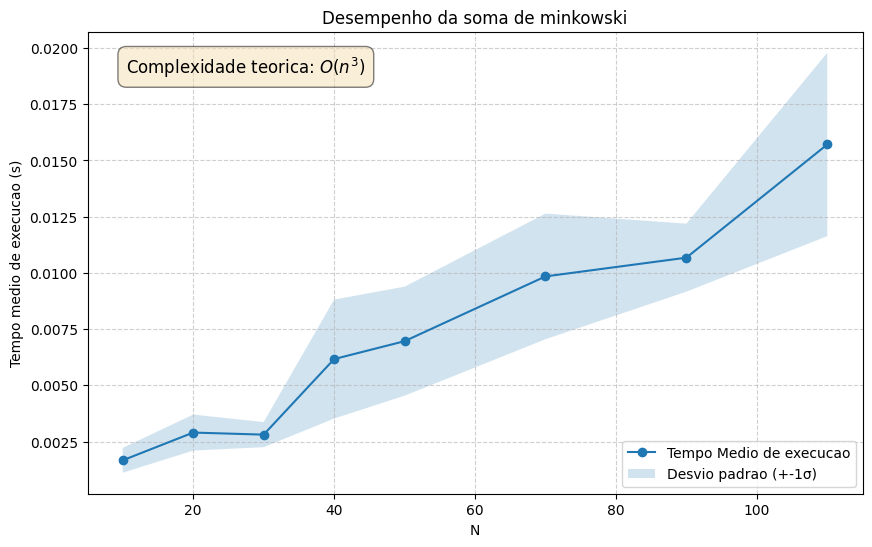

In [7]:
plt.figure(figsize=(10, 6))

x_data = df['target_vertices']
y_data = df['mean_time_s']
y_error = df['std_time_s']

plt.plot(x_data, y_data, marker='o', linestyle='-', label="Tempo Medio de execucao")
plt.fill_between(
    x_data,
    y_data - y_error,
    y_data + y_error,
    alpha=0.2,
    label="Desvio padrao (+-1σ)"
)

plt.title('Desempenho da soma de minkowski')
plt.xlabel('N')
plt.ylabel('Tempo medio de execucao (s)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.text(0.05, 0.95, 'Complexidade teorica: $O(n^3)$',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.savefig('minkowski_performance_graph_N.png')
print("Gráfico 'minkowski_performance_graph_N.png' salvo.")
plt.show()

Gráfico 'minkowski_performance_graph_MN.png' salvo.


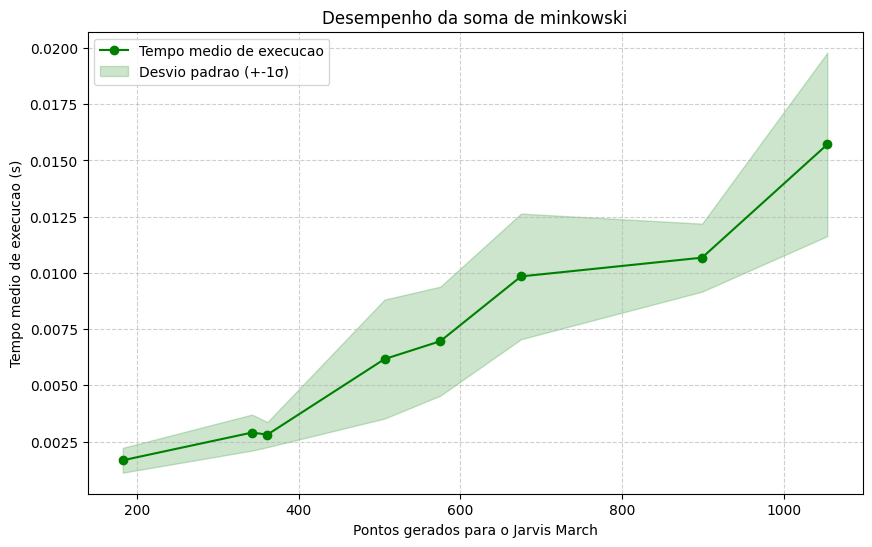

In [8]:
plt.figure(figsize=(10, 6))

x_data = df['mn_points_generated']
y_data = df['mean_time_s']
y_error = df['std_time_s']

plt.plot(x_data, y_data, marker='o', linestyle='-', label="Tempo medio de execucao", color='green')
plt.fill_between(
    x_data,
    y_data - y_error,
    y_data + y_error,
    alpha=0.2,
    color='green',
    label="Desvio padrao (+-1σ)"
)

plt.title('Desempenho da soma de minkowski')
plt.xlabel('Pontos gerados para o Jarvis March')
plt.ylabel('Tempo medio de execucao (s)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.savefig('minkowski_performance_graph_MN.png')
print("Gráfico 'minkowski_performance_graph_MN.png' salvo.")
plt.show()